In [1]:
#To supress Future Warning of Pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
#Importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15.0
plt.rcParams['figure.figsize'] = [15, 7] 
import seaborn as sns

In [2]:
df = pd.read_csv("Facebook_Marketplace_data.csv")

# Data Assessment

## Summary

The dataset provides key insights into the social media engagement of Thai fashion and cosmetics sellers, capturing how users engage with these posts. It includes metrics such as the number of reactions (like, love, wow, etc.), comments, and shares each post receives. By analyzing post types and timing, businesses can better understand what drives customer engagement and optimize their social media strategies accordingly.

## Column Descriptions

- **status_id**: This column represents the unique identifier for each Facebook post.
- **status_type**: This column indicates the type of Facebook post (e.g., video, photo, status, link).
- **status_published**: This column records the date and time when the Facebook post was published.
- **num_reactions**: This column shows the total number of reactions (likes, loves, etc.) received by the post.
- **num_comments**: This column captures the total number of comments received on the post.
- **num_shares**: This column reflects the total number of shares the post received.
- **num_likes**: This column indicates the number of 'Like' reactions on the post.
- **num_loves**: This column indicates the number of 'Love' reactions on the post.
- **num_wows**: This column indicates the number of 'Wow' reactions on the post.
- **num_hahas**: This column indicates the number of 'Haha' reactions on the post.
- **num_sads**: This column indicates the number of 'Sad' reactions on the post.
- **num_angrys**: This column indicates the number of 'Angry' reactions on the post.

## Issues with dataset

1. Dirty Data
   - `status_type`, `status_published` are assigned wrong data type.
2. Messy Data
   - `Column1`, `Column2`, `Column3`, and `Column4` are null columns and should be removed.
   - `status_id` is same as index and should be removed as it is irrelevant.

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [5]:
df[df.duplicated()]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4


In [6]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [7]:
df[df['num_reactions']<0]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4


In [8]:
df[df['num_comments']<0]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4


In [9]:
df[df['num_shares']<0]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4


In [10]:
df[df['num_likes']<0]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4


In [11]:
df[df['num_loves']<0]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4


In [12]:
df[df['num_wows']<0]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4


In [13]:
df[df['num_hahas']<0]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4


In [14]:
df[df['num_sads']<0]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4


In [15]:
df[df['num_angrys']<0]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4


# Data Cleaning

In [16]:
import copy
df1 = df.copy(deep=True)

In [17]:
#Correcting data type of status_type
df1['status_type'] = df1['status_type'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   status_id         7050 non-null   int64   
 1   status_type       7050 non-null   category
 2   status_published  7050 non-null   object  
 3   num_reactions     7050 non-null   int64   
 4   num_comments      7050 non-null   int64   
 5   num_shares        7050 non-null   int64   
 6   num_likes         7050 non-null   int64   
 7   num_loves         7050 non-null   int64   
 8   num_wows          7050 non-null   int64   
 9   num_hahas         7050 non-null   int64   
 10  num_sads          7050 non-null   int64   
 11  num_angrys        7050 non-null   int64   
 12  Column1           0 non-null      float64 
 13  Column2           0 non-null      float64 
 14  Column3           0 non-null      float64 
 15  Column4           0 non-null      float64 
dtypes: category(1), float64(

In [18]:
#Removing null columns and status_id
df1 = df1.drop(columns=['Column1','Column2','Column3','Column4','status_id'])
df1.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [19]:
#Splitting status published
df1['status_published'] = pd.to_datetime(df1['status_published'], format='%m/%d/%Y %H:%M')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_type       7050 non-null   category      
 1   status_published  7050 non-null   datetime64[ns]
 2   num_reactions     7050 non-null   int64         
 3   num_comments      7050 non-null   int64         
 4   num_shares        7050 non-null   int64         
 5   num_likes         7050 non-null   int64         
 6   num_loves         7050 non-null   int64         
 7   num_wows          7050 non-null   int64         
 8   num_hahas         7050 non-null   int64         
 9   num_sads          7050 non-null   int64         
 10  num_angrys        7050 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(9)
memory usage: 558.0 KB


In [20]:
df1 = df1.reset_index(drop=True)
df1.sample(5)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
5319,video,2018-03-21 22:10:00,12,1,3,12,0,0,0,0,0
149,video,2017-09-20 21:25:00,337,247,27,300,35,1,1,0,0
4193,video,2018-01-14 02:53:00,1,0,0,1,0,0,0,0,0
6314,photo,2018-05-19 05:22:00,51,7,0,48,0,1,0,0,2
5960,video,2017-11-30 01:11:00,314,1488,446,206,106,0,0,0,2


# Exploratory Data Analysis

## How does the time of upload (status_published)  affects the num_reaction?

**`Conclusion:`**

- Reactions are generally spread throughout the day, with slightly higher concentrations in the early morning and late evening hours.

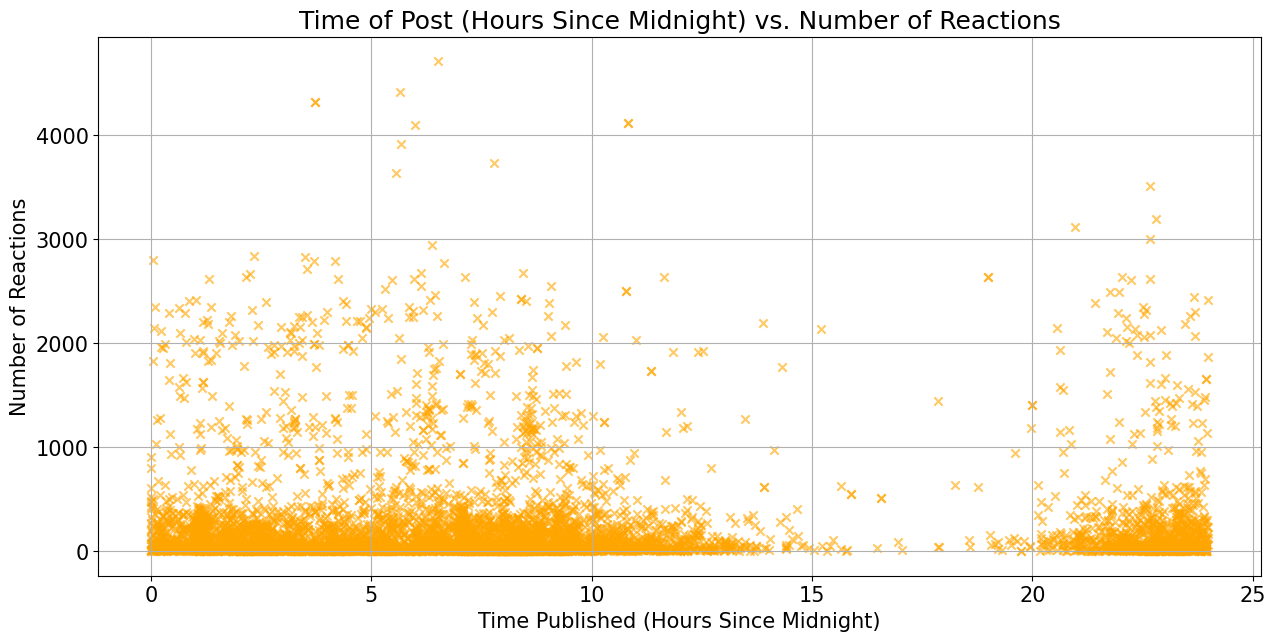

In [21]:
# Convert time to hours since midnight for easier plotting
tempdf = df1.copy(deep=True)
tempdf['hours_since_midnight'] = tempdf['status_published'].dt.hour + tempdf['status_published'].dt.minute / 60

# Plot hours_since_midnight vs num_reactions
plt.scatter(tempdf['hours_since_midnight'], tempdf['num_reactions'], alpha=0.6,marker='x',c='orange')
plt.title('Time of Post (Hours Since Midnight) vs. Number of Reactions')
plt.xlabel('Time Published (Hours Since Midnight)')
plt.ylabel('Number of Reactions')
plt.grid(True)
plt.show()

## Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

**`Conclusion:`**

- Reactions and likes have a nearly perfect linear relationship, increasing together at an equivalent rate.(Pearson:0.99, Spearman:1)
  
- At lower levels of engagement, reactions and comments show a strong linear relationship, increasing together almost in sync. However, as engagement rises, this correlation weakens, with a more varied spread between reactions and comments, leading to an overall weak positive correlation.(Pearson:0.15, Spearman:0.73)

- Similar to the relationship between reactions and comments, lower levels of engagement show positive correlation between reactions and shares which decline to a weak positive correlation as engagement rises.(Pearson:0.25, Spearman:56)

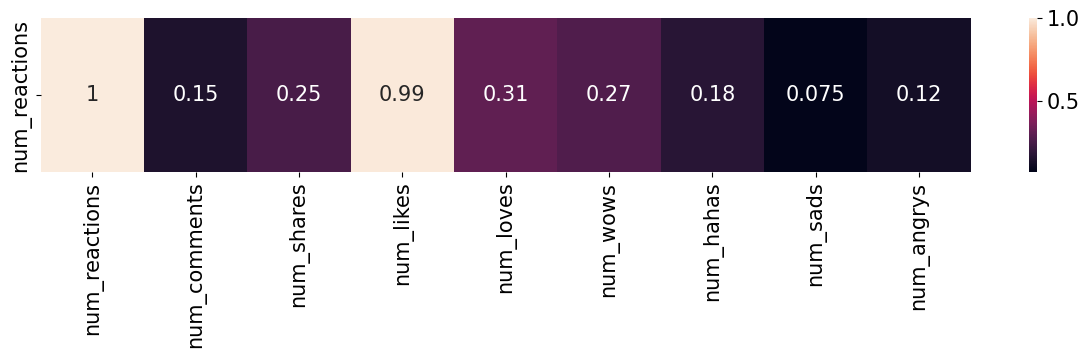

In [22]:
plt.figure(figsize=(15,2))
sns.heatmap(df1.corr(numeric_only=True).loc[['num_reactions']],annot=True)
plt.show()

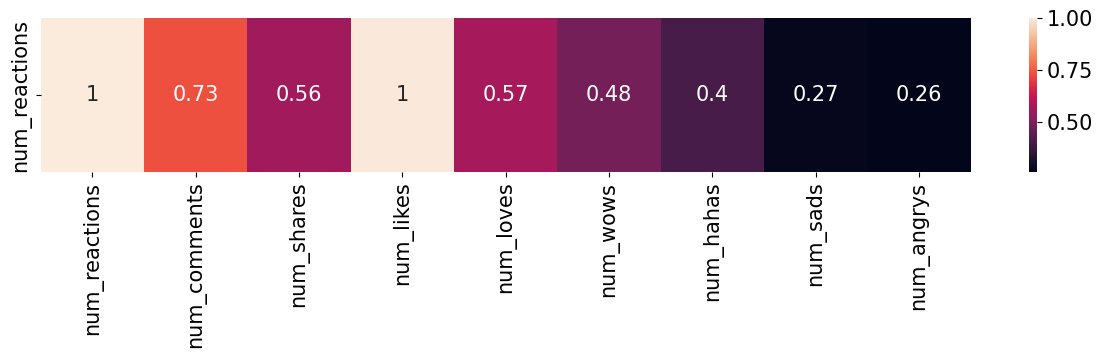

In [23]:
plt.figure(figsize=(15,2))
sns.heatmap(df1.corr(method='spearman',numeric_only=True).loc[['num_reactions']],annot=True)
plt.show()

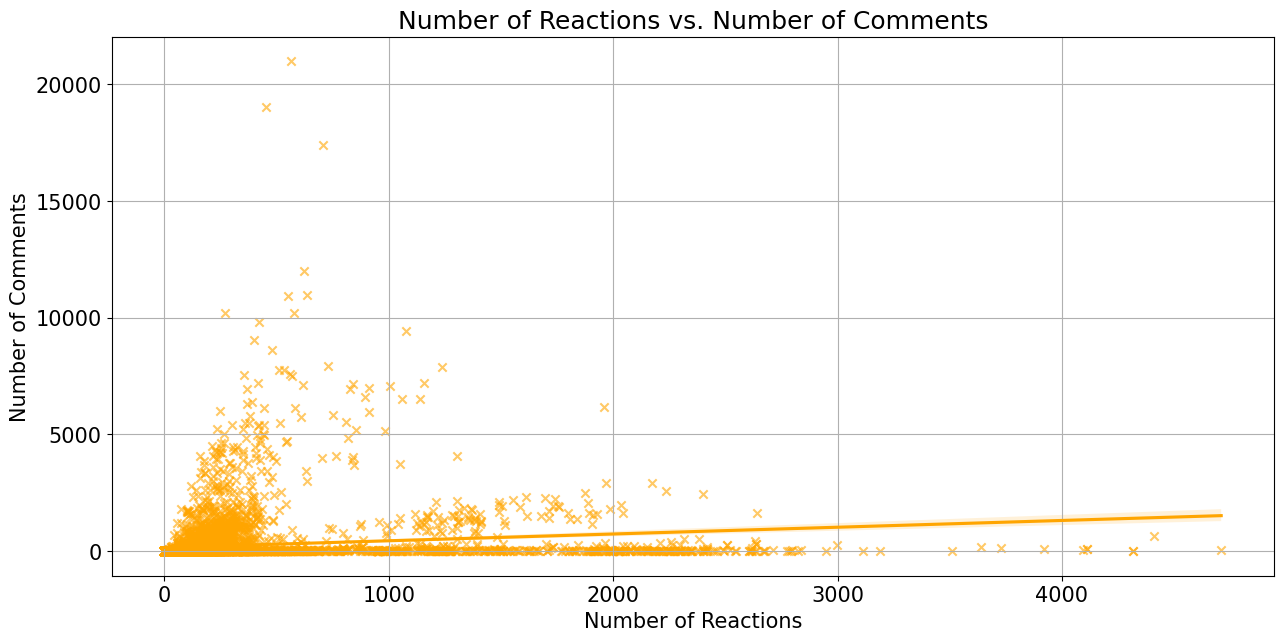

In [24]:
# Plotting a scatter plot between num_reactions and num_comments using seaborn
sns.regplot(x=df1['num_reactions'], y=df1['num_comments'], color='orange',scatter_kws={'alpha':0.6},marker='x')
plt.title('Number of Reactions vs. Number of Comments')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.show()

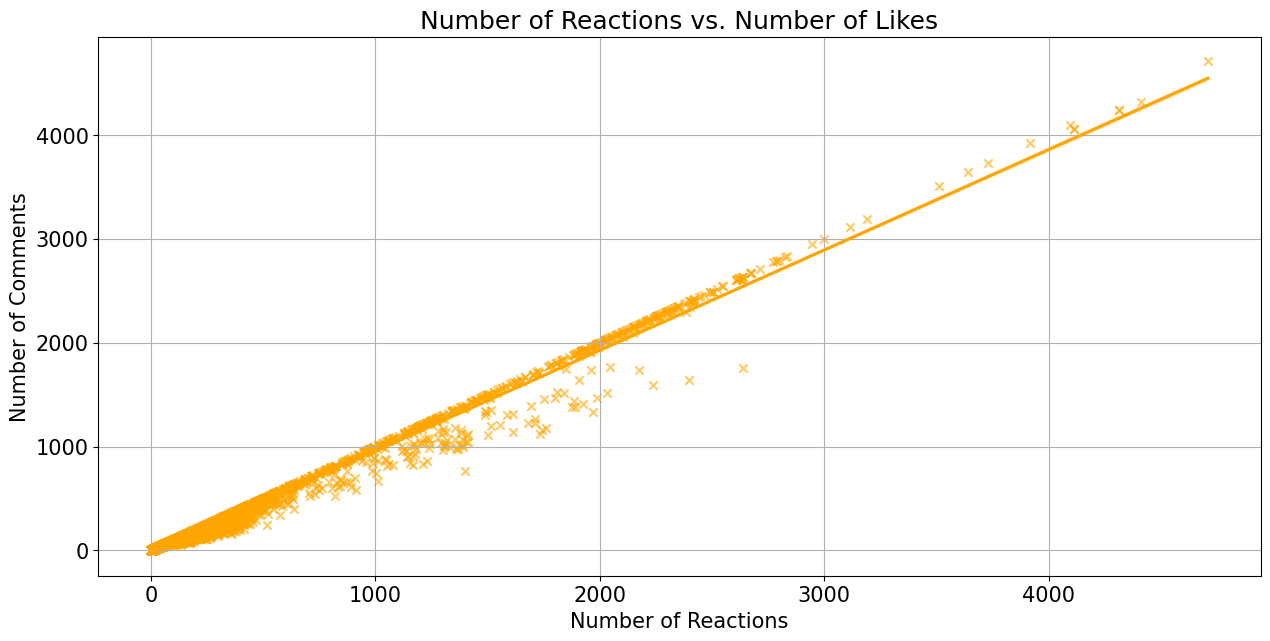

In [25]:
# Plotting a scatter plot between num_reactions and num_likes using seaborn
sns.regplot(x=df1['num_reactions'], y=df1['num_likes'], color='orange',scatter_kws={'alpha':0.6},marker='x')
plt.title('Number of Reactions vs. Number of Likes')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.show()

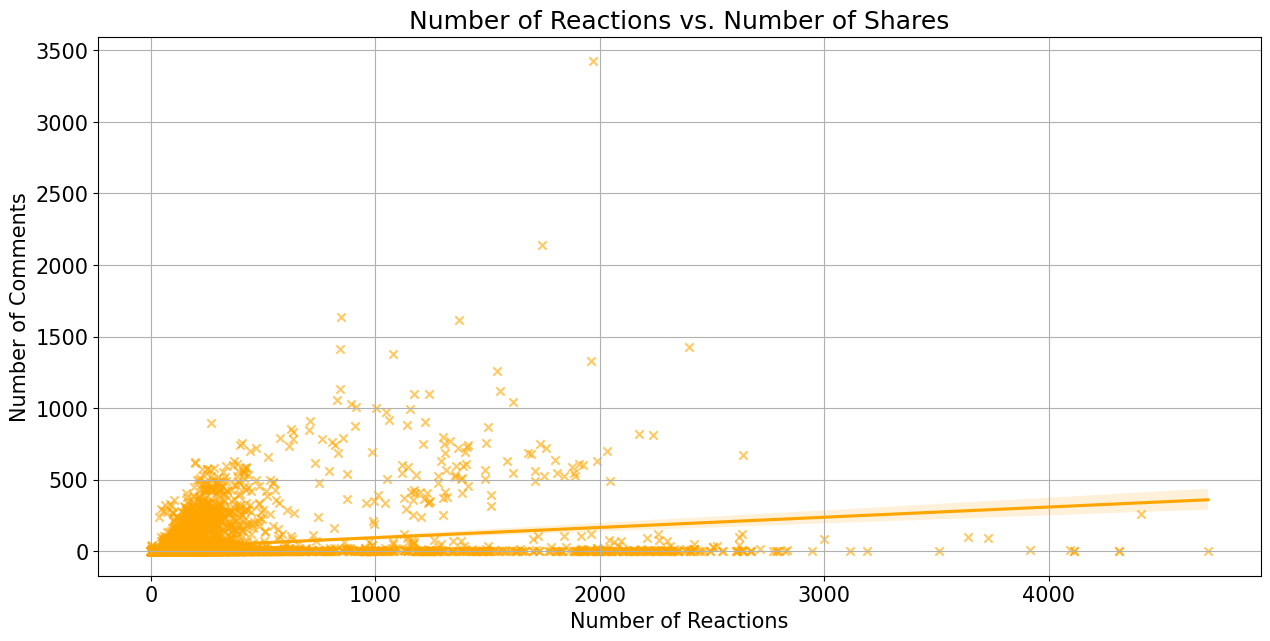

In [26]:
# Plotting a scatter plot between num_reactions and num_shares using seaborn
sns.regplot(x=df1['num_reactions'], y=df1['num_shares'], color='orange',scatter_kws={'alpha':0.6},marker='x')
plt.title('Number of Reactions vs. Number of Shares')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.show()

## What is the count of different types of posts in the dataset?

**`Conclusion:`**

- The dataset consists of 60.8% photos (4288 posts), 33.1% videos (2334 posts), 5.2% statuses (364 posts), and 0.9% links (63 posts).

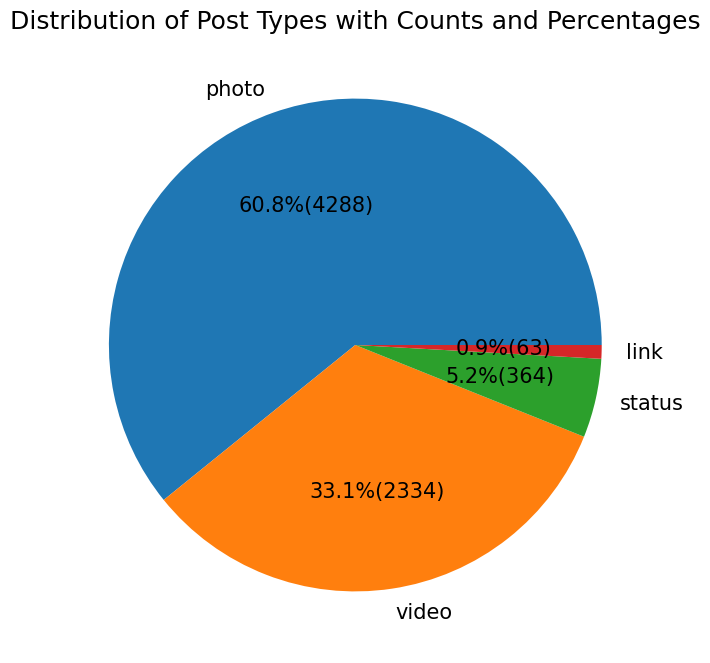

In [27]:
# Calculate the count of different types of posts
post_type_counts = df1['status_type'].value_counts()
# Define a function to format the labels
def format_labels(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{pct:.1f}%({absolute})"

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    post_type_counts, 
    labels=post_type_counts.index, 
    autopct=lambda pct: format_labels(pct, post_type_counts), 
)
plt.title('Distribution of Post Types with Counts and Percentages')
plt.show()

## What is the average value of num_reaction, num_comments, num_shares for each post type?

**`Conclusion:`**

- The average number of reactions is highest for status posts (439) and lowest for photo posts (181). Video posts receive the most comments (642) and shares (116), while links have the fewest interactions overall, with 6 comments and 4 shares on average.

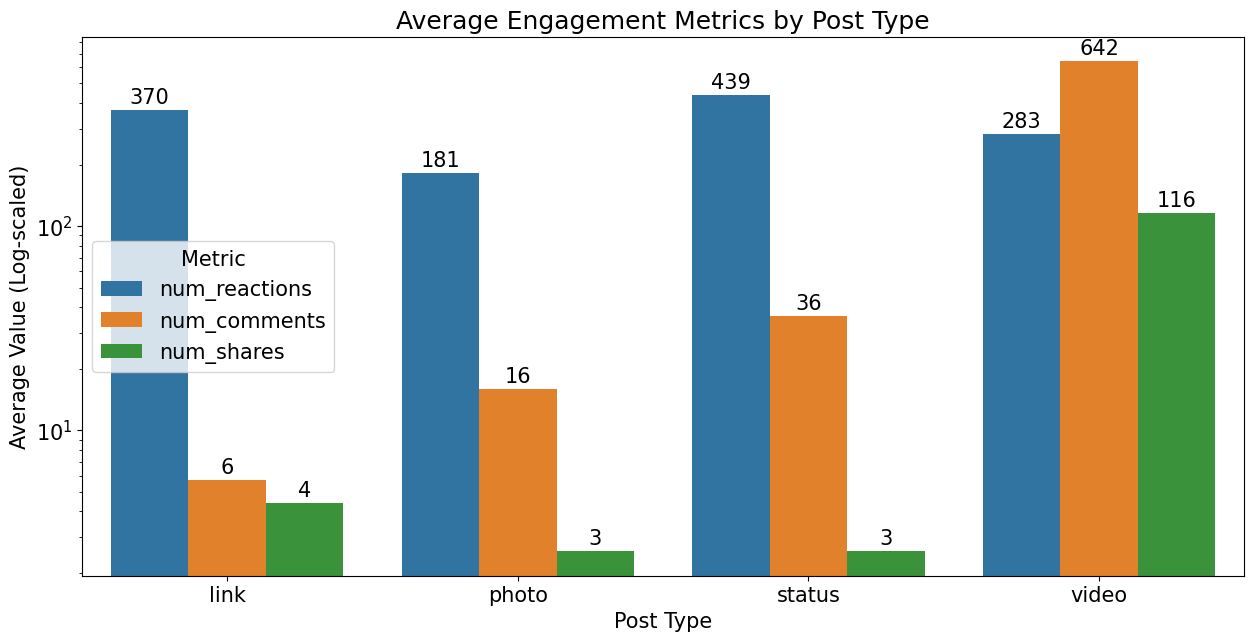

In [28]:
means = df1.groupby(by='status_type').aggregate('mean')[['num_reactions','num_comments','num_shares']]
# Reshape the data for seaborn
means_reset = means.reset_index().melt(id_vars='status_type', var_name='Metric', value_name='Average Value')

# Create the grouped bar chart using seaborn
barplot = sns.barplot(data=means_reset, x='status_type', y='Average Value', hue='Metric')

# Annotate each bar with the corresponding value (height)
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.0f}',  # Use the height of the bar as the value
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9),  # Offset the text slightly above the bar
                     textcoords = 'offset points')
plt.title("Average Engagement Metrics by Post Type")
plt.xlabel('Post Type')
plt.ylabel('Average Value (Log-scaled)')
plt.yscale('log')
plt.show()

# K-Means Clustering

## Training the model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
categorical_columns_list = "status_type"
numerical_columns_list = ["num_reactions", "num_comments",  "num_shares", "num_likes", "num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys"]
data = df1.drop(columns='status_published')
data = pd.get_dummies(data, columns=[categorical_columns_list], drop_first=True)
# Train-test split
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns_list])
X_test_scaled = scaler.transform(X_test[numerical_columns_list])

X_train[numerical_columns_list] = X_train_scaled
X_test[numerical_columns_list] = X_test_scaled
# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)

# Predict the clusters for training and test data
train_labels = kmeans.predict(X_train)
test_labels = kmeans.predict(X_test)

# Evaluate the model using inertia (sum of squared distances of samples to their closest cluster center)
train_inertia = kmeans.inertia_
test_inertia = kmeans.score(X_test)

print(f"Training Inertia: {train_inertia}")
print(f"Test Inertia: {abs(test_inertia)}")  # score returns negative inertia, so we take abs()

Training Inertia: 26084.409479478374
Test Inertia: 8740.495755769187


## Re-training after finding optimal number of clusters

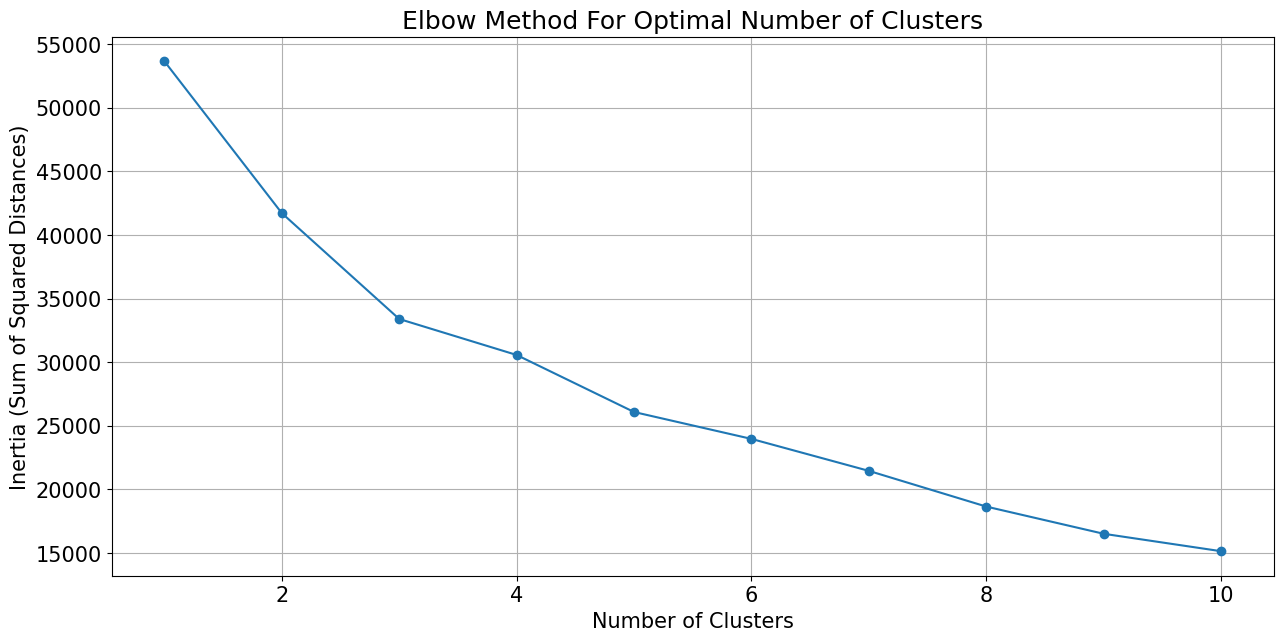

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_range = range(1, 11)
inertia = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.grid(True)
plt.show()


In [31]:
# Apply K-Means with optimal k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Predict the clusters for training and test data
train_labels = kmeans.predict(X_train)
test_labels = kmeans.predict(X_test)

# Evaluate the model using inertia (sum of squared distances of samples to their closest cluster center)
train_inertia = kmeans.inertia_
test_inertia = kmeans.score(X_test)

print(f"Training Inertia: {train_inertia}")
print(f"Test Inertia: {abs(test_inertia)}")  # score returns negative inertia, so we take abs()

Training Inertia: 33393.57298849999
Test Inertia: 10114.10106064193
